**Purpose of this code**

Since the SPY MA crossover seem to be non effective, there are two hypothesis to why that was the case. 1) the strategy may be better suited for more volatile asset 2) the strategy is slow (since we had few moments that we could have grabbed but could not with this stratgy)

I am testing the hypothesis 1 in this note. 

First I let the python to compute which asset is more "volatile" so that I don't have to hard-code. But since there are too many stocks, and cannot scan every single one. I am picking the big tech stocks (which likely is very volatile)

then will implement the same strategy as the baseline strategy (50/200 MA crossover) and see its effectiveness

In [1]:
!pip install yfinance pandas matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # We can use this for standard deviation

In [4]:
# --- 1. Define Our "Universe" of Stocks to Scan ---
# We can't scan the whole market, so we'll pick a list
# of well-known, potentially volatile tech/growth stocks.
tickers_to_check = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'NFLX', 'META', 'AMD']

# --- 2. Define Timeframe for Analysis ---
# We'll use the same timeframe as our backtest
start_date = '2010-01-01'
end_date = '2023-12-31'

# --- 3. Create a Dictionary to Store Volatility Scores ---
volatility_scores = {}

print("--- Starting Volatility Scan ---")

# --- 4. Loop Through, Download, and Calculate ---
for ticker in tickers_to_check:
    print(f"Analyzing: {ticker}...")
    
    # Download data for this one stock
    temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output
    
    # Calculate daily returns
    temp_data['Daily_Return'] = temp_data['Close'].pct_change()
    
    # Calculate the standard deviation of its daily returns
    # This is our "volatility" score
    daily_volatility = temp_data['Daily_Return'].std()
    
    # Store the score
    volatility_scores[ticker] = daily_volatility

# --- 5. Find the Winner ---
# This line finds the "key" (the ticker) that has the "max" value
chosen_ticker = max(volatility_scores, key=volatility_scores.get)

print("\n--- Volatility Scan Complete ---")
print(f"The most volatile stock was: {chosen_ticker}")
print(f"Its daily volatility score was: {volatility_scores[chosen_ticker]:.4f}")

--- Starting Volatility Scan ---
Analyzing: AAPL...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: MSFT...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: GOOGL...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: AMZN...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: TSLA...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: NVDA...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: NFLX...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: META...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output


Analyzing: AMD...


C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\3567996583.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False cleans up the output



--- Volatility Scan Complete ---
The most volatile stock was: TSLA
Its daily volatility score was: 0.0358


In [5]:
# --- 1. Our Ticker is Now Chosen Programmatically! ---
ticker = chosen_ticker 
print(f"\n--- Starting Backtest for: {ticker} ---")

# --- 2. Download the data for our chosen stock ---
data = yf.download(ticker, start=start_date, end=end_date)

# --- 3. Display the first 5 rows ---
print(data.head())

C:\Users\Graduate\AppData\Local\Temp\ipykernel_18108\1883211720.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


--- Starting Backtest for: TSLA ---
Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [6]:
# --- 1. Define our trend-line windows ---
short_window = 50
long_window = 200

# --- 2. Calculate the SMAs ---
# This creates two new columns in our 'data' spreadsheet
# .rolling(window=...) creates a 50-day sliding window
# .mean() calculates the average of that window
#
# **THIS IS THE LINE WE FIXED**
# We use 'Close' instead of 'Adj Close'
data['SMA_50'] = data['Close'].rolling(window=short_window).mean()
data['SMA_200'] = data['Close'].rolling(window=long_window).mean()

# --- 3. Create the "Signal" ---
# This is our raw rule.
# We create a new 'Signal' column, default to 0 (meaning "Hold Cash")
data['Signal'] = 0

# Find all rows where SMA_50 > SMA_200 and set 'Signal' to 1 (meaning "Buy")
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1

# --- 4. Create the "Position" ---
# This is the MOST important concept: "No Crystal Balls"
#
# We can't use today's closing price to decide to buy today.
# We get the signal at the *end* of the day (at the close).
# We can only act on it (take a position) on the *next day's* open.
#
# .shift(1) "shifts" the entire 'Signal' column down by one day.
# So, today's 'Position' is based on *yesterday's* 'Signal'.
# This avoids "lookahead bias" and makes our test realistic.
data['Position'] = data['Signal'].shift(1)

# Let's look at the end of the data to see our new columns
# You'll see "NaN" (Not a Number) for the first 200 rows.
# This is normal! We needed 200 days of data to calculate the first SMA_200.
print("\nLast 5 rows with our new signals:")
print(data.tail())


Last 5 rows with our new signals:
Price            Close        High         Low        Open     Volume  \
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA   
Date                                                                    
2023-12-22  252.539993  258.220001  251.369995  256.760010   93370100   
2023-12-26  256.609985  257.970001  252.910004  254.490005   86892400   
2023-12-27  261.440002  263.339996  257.519989  258.350006  106494400   
2023-12-28  253.179993  265.130005  252.710007  263.660004  113619900   
2023-12-29  248.479996  255.190002  247.429993  255.100006  100891600   

Price           SMA_50    SMA_200 Signal Position  
Ticker                                             
Date                                               
2023-12-22  232.553000  227.70775      1      1.0  
2023-12-26  232.662800  228.12360      1      1.0  
2023-12-27  232.813200  228.55840      1      1.0  
2023-12-28  232.779799  228.90800      1      1.0  
2023-12-29  232.

In [7]:
# --- 1. Calculate Benchmark Returns (Buy and Hold) ---
data['Market_Returns'] = data['Close'].pct_change()

# --- 2. Calculate our Strategy Returns ---
# (Market Return) * (Our Position)
data['Strategy_Returns'] = data['Market_Returns'] * data['Position']

data.fillna(0, inplace=True)
# --- 3. Calculate Cumulative Returns (Equity Curves) ---
# We add 1 to the returns (e.g., 0.01 becomes 1.01)
# Then we use .cumprod() to compound them, showing $1 growth
data['Cumulative_Market'] = (1 + data['Market_Returns']).cumprod()
data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()

print("\nLast 5 rows with our backtest results:")
print(data.tail())


Last 5 rows with our backtest results:
Price            Close        High         Low        Open     Volume  \
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA   
Date                                                                    
2023-12-22  252.539993  258.220001  251.369995  256.760010   93370100   
2023-12-26  256.609985  257.970001  252.910004  254.490005   86892400   
2023-12-27  261.440002  263.339996  257.519989  258.350006  106494400   
2023-12-28  253.179993  265.130005  252.710007  263.660004  113619900   
2023-12-29  248.479996  255.190002  247.429993  255.100006  100891600   

Price           SMA_50    SMA_200 Signal Position Market_Returns  \
Ticker                                                             
Date                                                               
2023-12-22  232.553000  227.70775      1      1.0      -0.007701   
2023-12-26  232.662800  228.12360      1      1.0       0.016116   
2023-12-27  232.813200  228.55840  

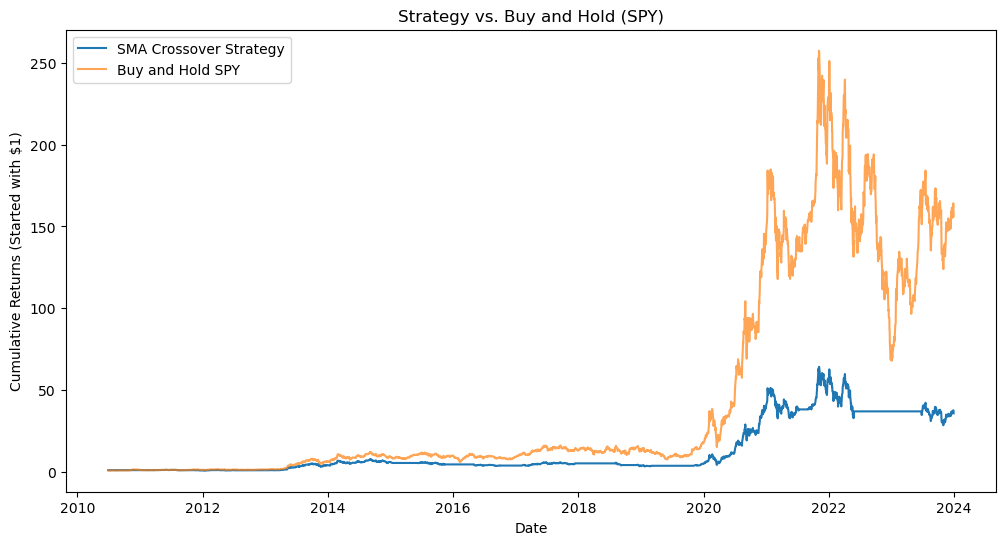

In [8]:
# --- 1. Create the plot ---
plt.figure(figsize=(12, 6)) # Set a nice big size

# --- 2. Plot our two equity curves ---
# We plot the 'Date' (the index) vs. the cumulative values
plt.plot(data.index, data['Cumulative_Strategy'], label='SMA Crossover Strategy')
plt.plot(data.index, data['Cumulative_Market'], label='Buy and Hold SPY', alpha=0.7) # alpha=0.7 makes it slightly transparent

# --- 3. Add titles and labels ---
plt.title('Strategy vs. Buy and Hold (SPY)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (Started with $1)')
plt.legend() # Show the legend

# --- 4. Show the plot ---
plt.show()

In [9]:
# --- 1. Calculate Max Drawdown ---
# We calculate the "peak" value our portfolio has ever reached
data['Peak'] = data['Cumulative_Strategy'].cummax()

# We calculate the drawdown: (% drop from the last peak)
data['Drawdown'] = (data['Cumulative_Strategy'] - data['Peak']) / data['Peak']

# We find the *worst* (minimum) drawdown value
max_drawdown = data['Drawdown'].min()

# --- 2. Calculate Sharpe Ratio ---
# We need the *daily* returns, not the cumulative ones
# We'll use 252 as the number of trading days in a year
#
# First, get the average *daily* return
mean_daily_return = data['Strategy_Returns'].mean()

# Next, get the *standard deviation* of daily returns (this is our "risk")
std_daily_return = data['Strategy_Returns'].std()

# Annualize them to get the Sharpe Ratio
# We assume risk-free rate is 0
sharpe_ratio = (mean_daily_return * 252) / (std_daily_return * (252**0.5))


# --- 3. Print the Results ---
print("--- Strategy Performance ---")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown*100:.2f}%")

# Let's also get the benchmark's numbers for comparison
benchmark_sharpe = (data['Market_Returns'].mean() * 252) / (data['Market_Returns'].std() * (252**0.5))
benchmark_peak = data['Cumulative_Market'].cummax()
benchmark_drawdown = (data['Cumulative_Market'] - benchmark_peak) / benchmark_peak
benchmark_max_drawdown = benchmark_drawdown.min()

print("\n--- Benchmark (Buy and Hold) Performance ---")
print(f"Sharpe Ratio: {benchmark_sharpe:.2f}")
print(f"Max Drawdown: {benchmark_max_drawdown*100:.2f}%")

--- Strategy Performance ---
Sharpe Ratio: 0.81
Max Drawdown: -60.63%

--- Benchmark (Buy and Hold) Performance ---
Sharpe Ratio: 0.94
Max Drawdown: -73.63%


**What can I say from TSLA**

There is a slight downside protection (drawdown of -61% versus -74%) so this strategy saved me from additional 13% loss. 
However, this strategy is still ineffective as it makes me keep cash missing a huge opportunity to purchase at the crash (due to slow nature of this strategy). Now I want to check for other volatile assets to confirm my theory.

In [13]:
# --- 1. Define Our "Universe" of Stocks to Scan ---
tickers_to_check = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'NFLX', 'META', 'AMD', 'COIN', 'MSTR']

# --- 2. Define Timeframe for Analysis ---
start_date = '2010-01-01'
end_date = '2023-12-31'

# --- 3. Create a Dictionary to Store Volatility Scores ---
volatility_scores = {}

print("--- Starting Volatility Scan ---")

# --- 4. Loop Through, Download, and Calculate ---
for ticker in tickers_to_check:
    print(f"Analyzing: {ticker}...")
    
    # --- THIS IS THE FIX ---
    # It's now 'end=end_date'
    temp_data = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    
    # Check if we got data
    if temp_data.empty:
        print(f"Could not get data for {ticker}. Skipping.")
        continue
        
    temp_data['Daily_Return'] = temp_data['Close'].pct_change()
    daily_volatility = temp_data['Daily_Return'].std()
    volatility_scores[ticker] = daily_volatility

# --- 5. Find the "Top N" Winners ---
# We sort the dictionary by its values (the scores) in descending order
sorted_volatility = sorted(volatility_scores.items(), key=lambda item: item[1], reverse=True)

# Let's pick the Top 3
N = 3
top_n_tickers = [ticker for ticker, score in sorted_volatility[:N]]

print("\n--- Volatility Scan Complete ---")
print(f"The top {N} most volatile stocks are: {top_n_tickers}")

--- Starting Volatility Scan ---
Analyzing: AAPL...
Analyzing: MSFT...
Analyzing: GOOGL...
Analyzing: AMZN...
Analyzing: TSLA...
Analyzing: NVDA...
Analyzing: NFLX...
Analyzing: META...
Analyzing: AMD...
Analyzing: COIN...
Analyzing: MSTR...

--- Volatility Scan Complete ---
The top 3 most volatile stocks are: ['COIN', 'TSLA', 'AMD']


In [14]:
# --- 1. Create a list to store our results ---
all_results = []

# --- 2. Define our SMA windows ---
short_window = 50
long_window = 200

# --- 3. Start the loop ---
for ticker in top_n_tickers:
    print(f"\n--- Running Backtest for: {ticker} ---")
    
    # --- Phase 1: Get Data ---
    # --- THIS IS THE SECOND FIX ---
    # It's now 'end=end_date'
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True, progress=False)
    
    # --- Phase 2: Create Rules ---
    data['SMA_50'] = data['Close'].rolling(window=short_window).mean()
    data['SMA_200'] = data['Close'].rolling(window=long_window).mean()
    data['Signal'] = 0
    data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1
    data['Position'] = data['Signal'].shift(1)
    
    # --- Phase 3: Run Backtest ---
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = data['Market_Returns'] * data['Position']
    data.fillna(0, inplace=True) # Fix the NaN poison
    data['Cumulative_Market'] = (1 + data['Market_Returns']).cumprod()
    data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()
    
    # --- Phase 5: Get Metrics ---
    
    # --- Strategy Metrics ---
    mean_daily_return = data['Strategy_Returns'].mean()
    std_daily_return = data['Strategy_Returns'].std()
    sharpe_ratio = (mean_daily_return * 252) / (std_daily_return * (252**0.5))
    
    data['Peak'] = data['Cumulative_Strategy'].cummax()
    data['Drawdown'] = (data['Cumulative_Strategy'] - data['Peak']) / data['Peak']
    max_drawdown = data['Drawdown'].min()
    
    # --- Benchmark Metrics ---
    benchmark_mean_return = data['Market_Returns'].mean()
    benchmark_std_return = data['Market_Returns'].std()
    benchmark_sharpe = (benchmark_mean_return * 252) / (benchmark_std_return * (252**0.5))
    
    benchmark_peak = data['Cumulative_Market'].cummax()
    benchmark_drawdown = (data['Cumulative_Market'] - benchmark_peak) / benchmark_peak
    benchmark_max_drawdown = benchmark_drawdown.min()
    
    # --- Store the results in our list ---
    all_results.append({
        'Ticker': ticker,
        'Strategy_Sharpe': sharpe_ratio,
        'Strategy_Drawdown': max_drawdown,
        'Benchmark_Sharpe': benchmark_sharpe,
        'Benchmark_Drawdown': benchmark_max_drawdown
    })

print("\n--- All Backtests Complete ---")


--- Running Backtest for: COIN ---

--- Running Backtest for: TSLA ---

--- Running Backtest for: AMD ---

--- All Backtests Complete ---


In [15]:
# --- Convert our list of results into a DataFrame ---
results_df = pd.DataFrame(all_results)

# --- Display the results for each stock ---
print("--- Individual Results ---")
print(results_df.to_string()) # .to_string() prints the full table

# --- Calculate and display the averages ---
print("\n--- Average Performance Across All Stocks ---")
# This calculates the average of each *column*
print(results_df.mean(numeric_only=True))

--- Individual Results ---
  Ticker  Strategy_Sharpe  Strategy_Drawdown  Benchmark_Sharpe  Benchmark_Drawdown
0   COIN         0.616720          -0.449946          0.190124           -0.908979
1   TSLA         0.807109          -0.606265          0.941299           -0.736322
2    AMD         0.679841          -0.731024          0.623200           -0.840551

--- Average Performance Across All Stocks ---
Strategy_Sharpe       0.701223
Strategy_Drawdown    -0.595745
Benchmark_Sharpe      0.584874
Benchmark_Drawdown   -0.828617
dtype: float64


**now this is where it gets interesting...**

This strategy is not universal, it highly depends on each asset you are working with.

For COIN, the strategy provided a huge cussion for downside. Made "unsuitable for investing" stock into a survivable stock.
For TSLA, it was a mixed outcome. It is a trade-off between gain and risk management.
For AMD, the strategy delivered slightly better returns and risk management.

The strategy seems to work better for those assets with terrible crash or big clear cycles.

**now what...?**

For identifying high-volatility assets, one can analyze the historical volatility just like what I did, or use common sense like "new emerging industry", high P/E ratios.

since this strategy is rather a defensive, follow the trend type of strategy, I want to explore more of a offense strategy.
I want to check the fast strategy.

This is to be explored in next chapter.